# Question 1

Let $g_{a}(x) = x^a$. Then  

$$g_a^{(k)}(x) = a\cdot (a-1) \ldots (a-k+1)x^{a-k}$$  

Then
$$\lim_{x\downarrow 0} g_a^{(k)}(x) = a\cdot (a-1) \ldots (a-k+1)x^{a-k} = +\infty \quad (\forall k > a)$$

And 

$$\lim_{x\downarrow 0} g_a^{(k)}(x) = a\cdot (a-1) \ldots (a-k+1)x^{a-k} = k! \neq 0 \quad (k = a)$$

Since $f_a$ is piecewise defined, with $f_a(x) = 0$ $\forall x < 0$, if $f_a^{(k)}$ exists, then $f_a^{(k)}(x) = 0$ $\forall x < 0$ since the derivative of constant functions is $0$. Since $f_a^{(k)}(x) = g_a^{(k)}(x)$ $\forall x > 0$, we get that $f_a^{(k)}$ is not continuous at $0$ for $k \geq a$ by above.  

However, for $k < a$, 
$$\lim_{x \downarrow 0} f_a^{(k)}(x) = \lim_{x \downarrow 0} g_a^{(k)}(x) = \lim_{x \downarrow 0} a\cdot (a-1) \ldots (a-k+1)x^{a-k} = 0$$


$$\lim_{x \uparrow 0} f_a^{(k)}(x) = 0$$

and $f_a^{(k)}(0) = 0$. So $f_a^{(k)}$ is continuous at $0$. Continuity of $f_a^{(k)}$ away from $0$ is clear. So we get that $f_a^{(k)}$ is continuous for $k < a$.

Therefore, $$f_a \in C^k([-1,1]) \iff k < a$$


The largest $k+\alpha$ such that $f_a \in C^{k,\alpha}$ therefore happens at the largest $k < a$. It now remains to find the largest
$\alpha \in (0,1]$ such that $f_a \in C^{k,\alpha}$.

Let $k < a$ be the largest such integer. Let $\alpha > a-k \in (0,1]$. Then,  


$$
\begin{align}
&\sup_{-1 \leq x < y \leq 1}\frac{|f_a^{(k)}(x) - f_a^{(k)}(y)|}{|x-y|^{\alpha}} \\
\geq &\sup_{0 < y \leq 1}\frac{f_a^{(k)}(y)}{y^\alpha} \\
= &\sup_{0 < y \leq 1}\frac{a\cdot (a-1) \ldots (a-k+1)y^{a-k}}{y^{\alpha}} \\
= &C \sup_{0 < y \leq 1}\frac{y^{a-k}}{y^\alpha} \\ 
= &+\infty
\end{align}
$$
And so $f_a \notin C^{k,\alpha}$ for $\alpha > a-k$.  



Let $\alpha = a-k \in (0,1]$. Since  


$$\lim_{x \downarrow 0} f_a^{(k+1)}(x) = +\infty$$ 


but is bounded elsewhere, we get that for $x < y$, 

$$|f_a^{(k)}(x) - f_a^{(k)}(y)| \leq |f_a^{(k)}(y-x) - f_a^{(k)}(0)| = f_a^{(k)}(y-x)$$

So therefore, 
$$
\begin{align}
&\sup_{-1 \leq x < y \leq 1}\frac{|f_a^{(k)}(x) - f_a^{(k)}(y)|}{|x-y|^{\alpha}} \\
\leq &\sup_{-1 \leq x < y \leq 1}\frac{f_a^{(k)}(y-x)}{(y-x)^\alpha} \\
= &\sup_{-1 \leq x < y \leq 1}\frac{a\cdot (a-1) \ldots (a-k+1)(y-x)^{a-k}}{(y-x)^{a-k}} \\
=   &a\cdot (a-1) \ldots (a-k+1) \\
< &+\infty
\end{align}
$$

So $f_a \in C^{k, \alpha}$ where $k < a$ is the largest such integer, and $\alpha = a-k$.  
Therefore the largest $k+\alpha$ such that $f_a \in C^{k,\alpha}$ is $a$.

# Question 2

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.misc

In [0]:
f = lambda a: lambda x: np.power(x,a) if x > 0 else 0

In [0]:
def stepFunction(fa, n):
  midpoints = np.linspace(-1, 1, 2*n+1)[1:-1:2]
  values = np.array([fa(x) for x in midpoints])
  
  def step(x):
    index = np.argmin([abs(x - mi) for mi in midpoints])
    return values[index]

  return step  

In [0]:
def norm(fa, step, num_points=50000):
  x = np.linspace(-1,1,num_points)
  return max(abs(fa(xi) - step(xi)) for xi in x)

Below are a few plots of $f_a(x)$ vs a midpoint, piecewise step function approximating $f_a$ for different values of $a$ and $n$.

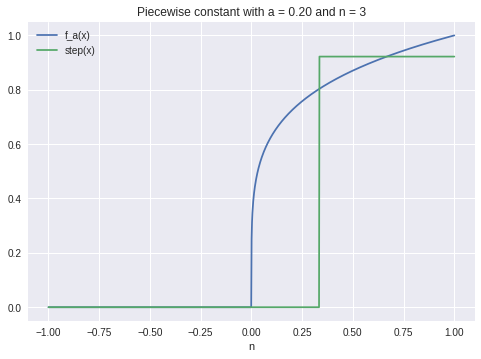

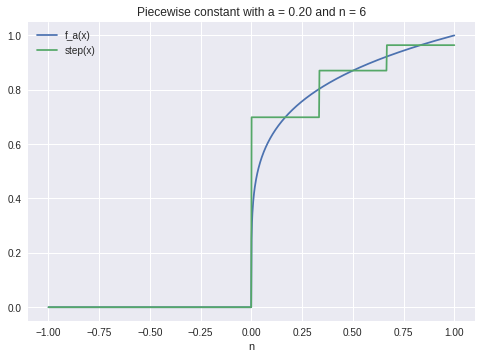

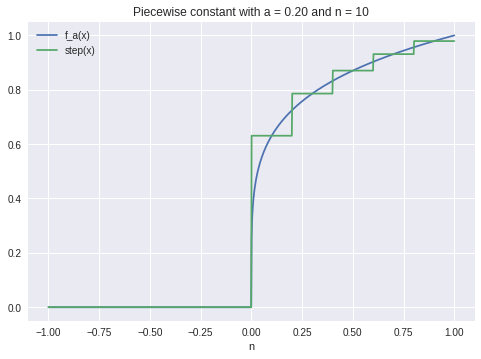

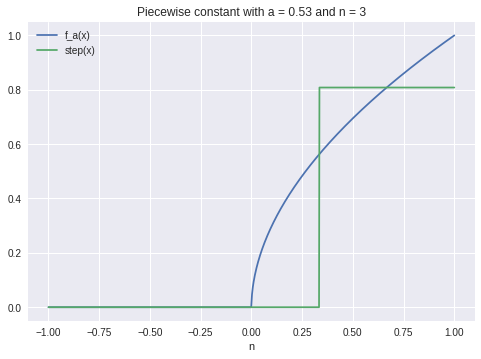

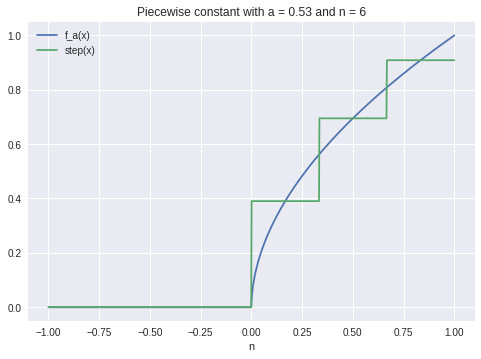

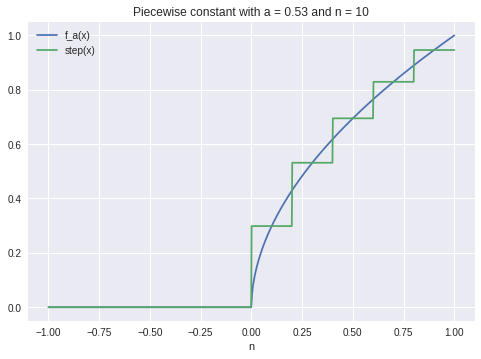

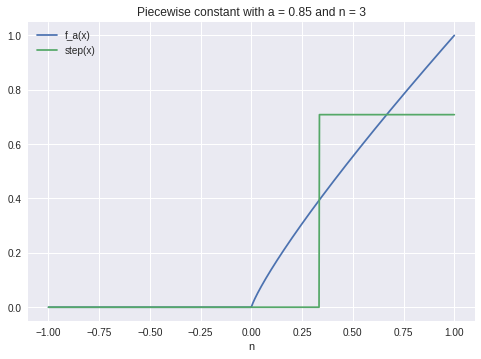

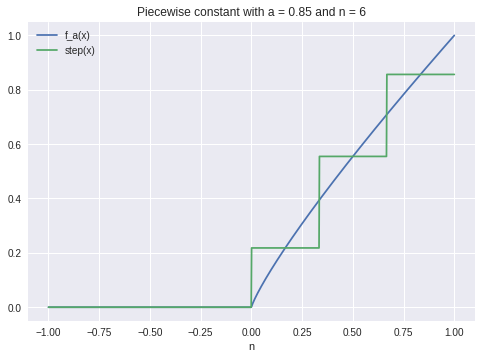

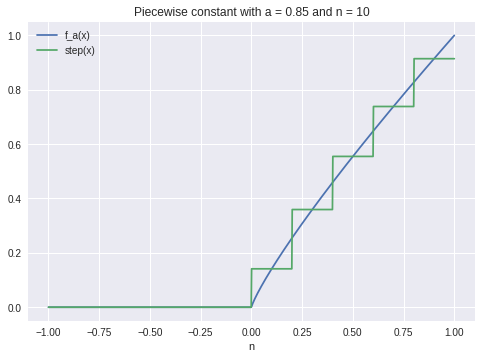

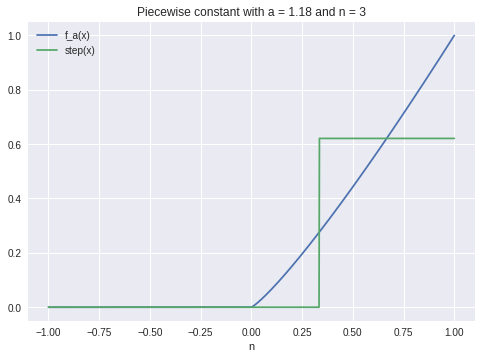

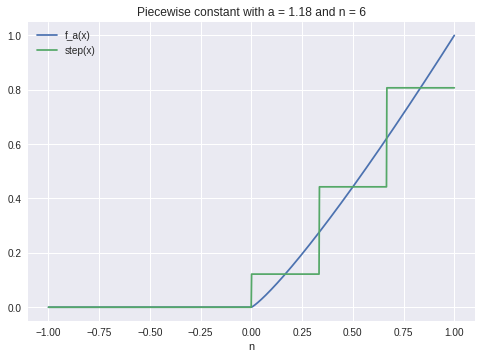

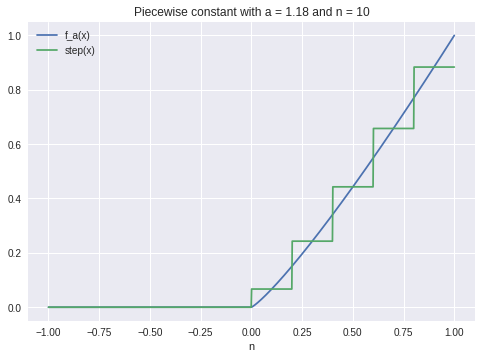

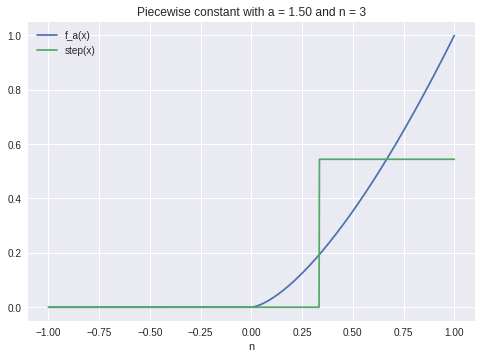

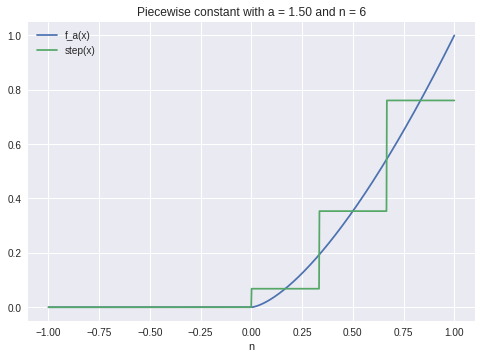

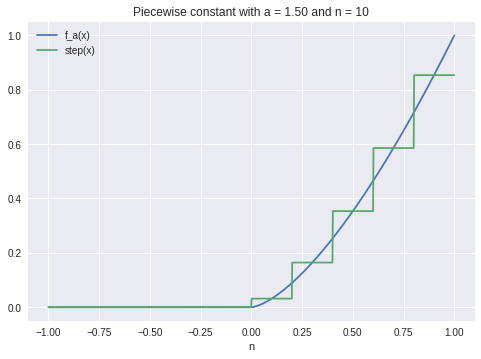

In [11]:
for a in np.linspace(0.2, 1.5, 5):
  for n in [3,6,10]:
    fa = f(a)
    step = stepFunction(fa, n)

    x = np.linspace(-1,1,1000)
    plt.plot(x, [fa(x_i) for x_i in x], label='f_a(x)')
    plt.plot(x, [step(x_i) for x_i in x], label='step(x)')
    plt.legend()
    plt.title("Piecewise constant with a = {:.2f} and n = {}".format(a, n))
    plt.xlabel("n")
    plt.show()

We now plot the approximated supremum error for different values of $a$, and plot against values of $n$. We then find $r$ such that $n^{-r}$ best approximates the error.

Given a = 0.500, r = 0.505


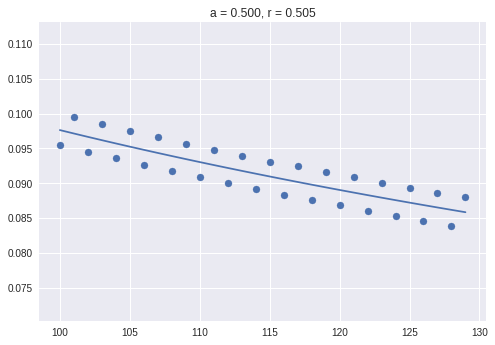

Given a = 0.611, r = 0.614


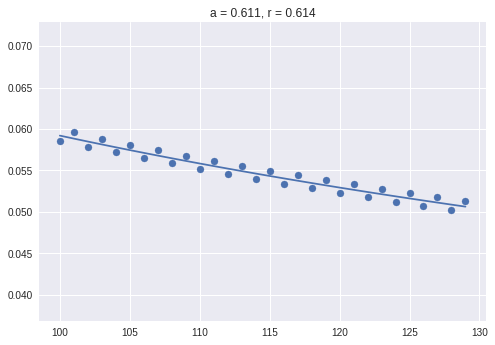

Given a = 0.722, r = 0.724


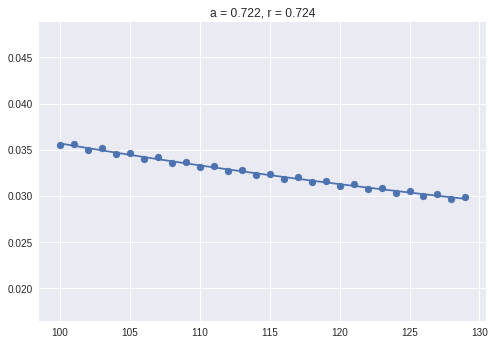

Given a = 0.833, r = 0.834


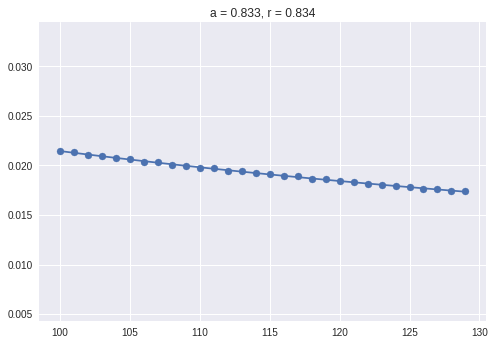

Given a = 0.944, r = 0.945


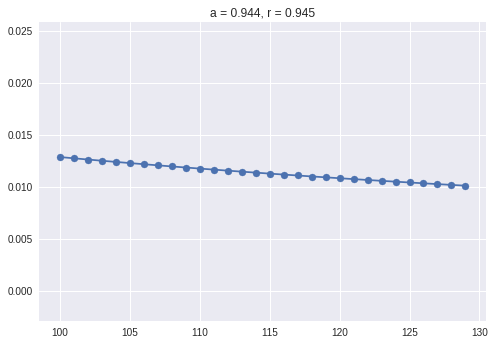

Given a = 1.056, r = 0.989


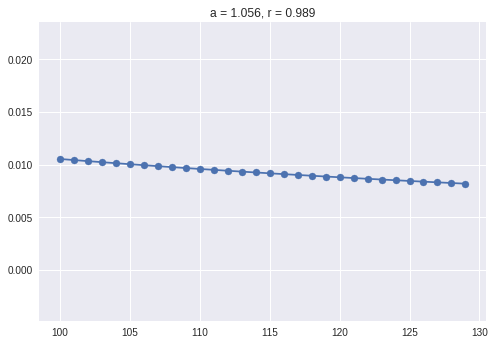

Given a = 1.167, r = 0.968


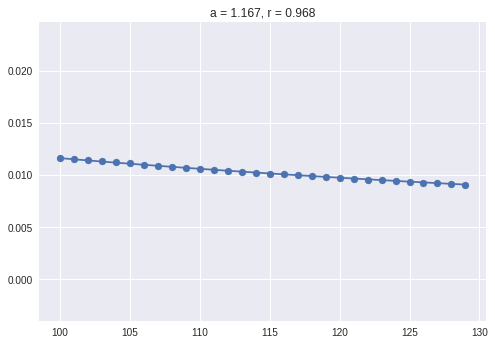

Given a = 1.278, r = 0.948


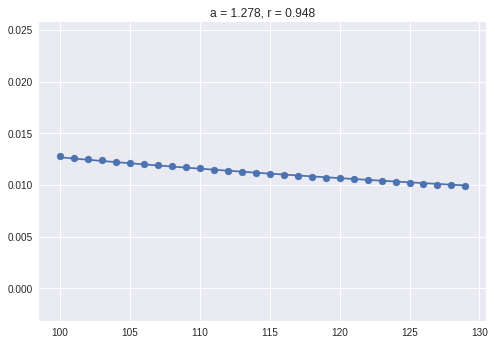

Given a = 1.389, r = 0.931


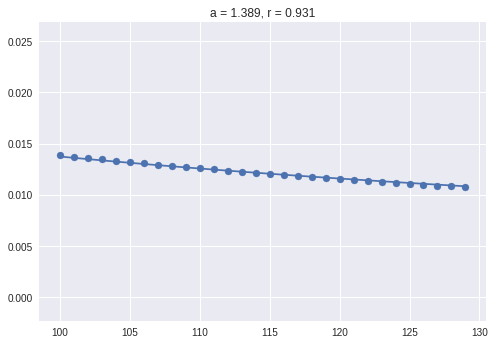

Given a = 1.500, r = 0.915


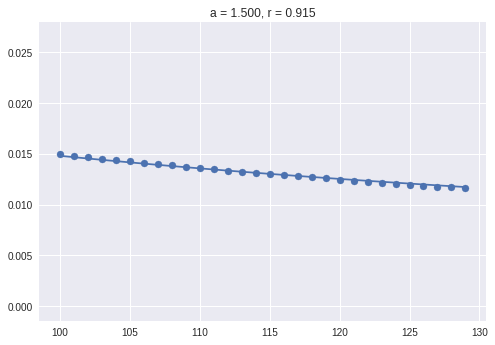

In [14]:
def r(a):
  fa = f(a)
  def r_a(n):
    return norm(fa, stepFunction(fa, n))
  return r_a


def approx_error(n, r):
  return np.power(n, -r)
  

def computeR():
  for a in np.linspace(0.5, 1.5, 10):
    fa = f(a)
    norm_per_n = lambda n: norm(fa, stepFunction(fa, n))
    ns = range(100, 130)
    ys = [norm_per_n(n) for n in ns]
    r, _ = curve_fit(approx_error, ns, ys)
    r = r[0]
    print("Given a = {:.3f}, r = {:.3f}".format(a, r))
    plt.scatter(ns, ys, label='norm')
    plt.plot(ns, approx_error(ns, r), label='r(n)')
    plt.title("a = {:.3f}, r = {:.3f}".format(a, r))
    plt.show()
    

computeR()

It appears as though there is a linear dependency between $a$ and $r$ for $a \leq 1$. However, for $a$ values greater than $1$, $r$ decreases slightly.

The piecewise step function $g_{a,n}(x) = f_a(t)$ for $x \in (t - \frac{1}{2n}, t + \frac{1}{2n})$. Using Taylor's approximation of $f_a$, we get  
$$f(x) = f(t) + f'(t)(x-t) + O\left(\frac{1}{(x-t)^{2}}\right)$$  

We therefore have that  
$$f(x) - g(x) \leq f(x) - f(t) = f'(t)(2n)^{-1} + (2n)^{-2} = O(n^{-1})$$

Since for $a < 1$, $f_a \in C^{0,a}$, by Jackson's inequality seen in class, the error is $\lesssim n^{-a}$ as shown empically above.

# Question 3

In [0]:
def piecewise_linear(fa, num_points):
  xs = np.linspace(-1,1,num_points)
  ys = np.array([fa(x) for x in xs])
  return lambda x: np.interp(x, xs, ys)

Below are a few plots of $f_a(x)$ vs piecewise linear function approximating $f_a$ for different values of $a$ and $n$.

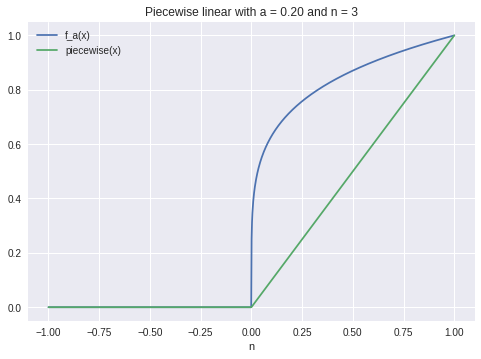

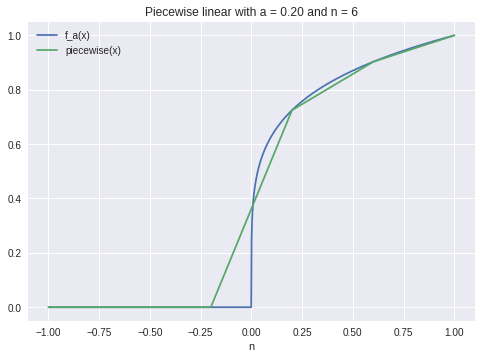

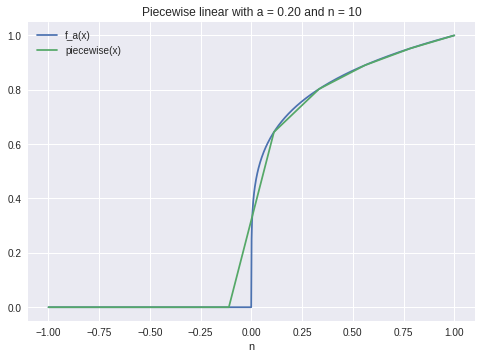

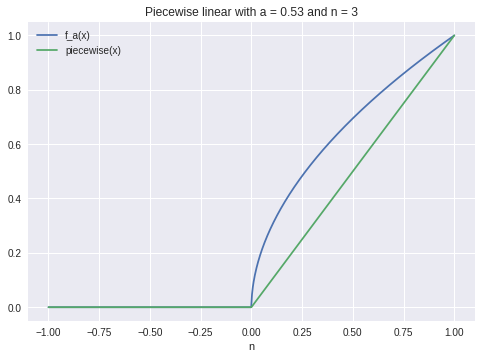

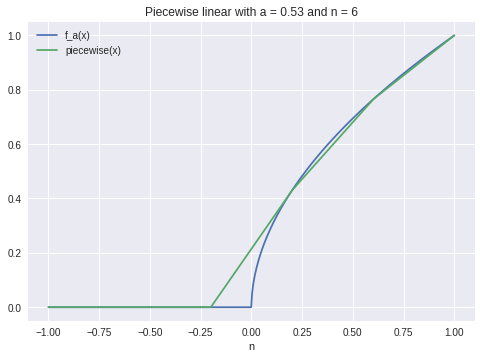

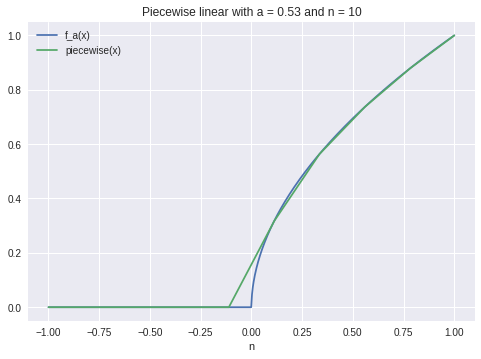

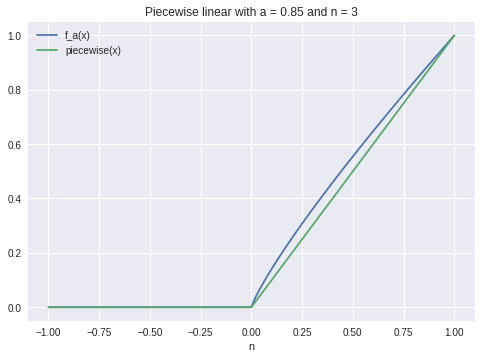

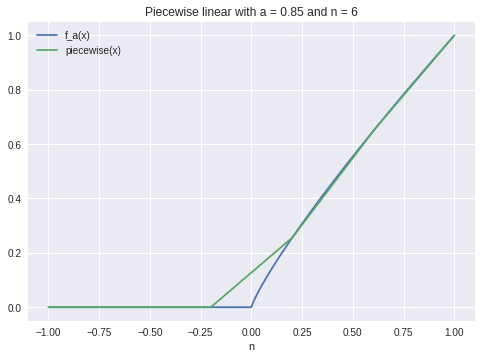

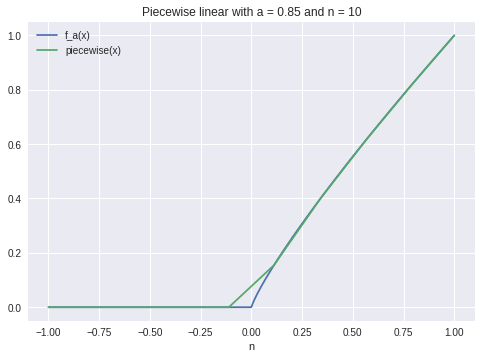

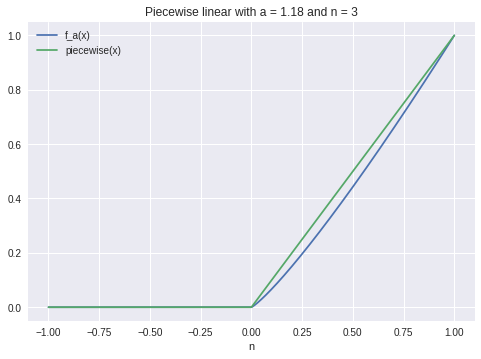

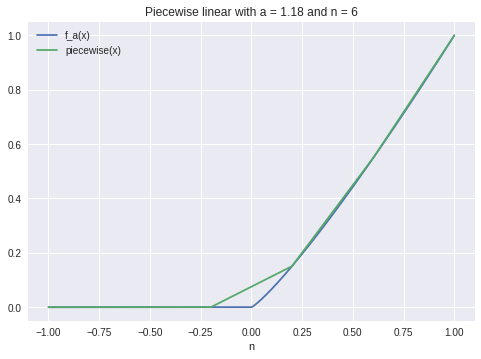

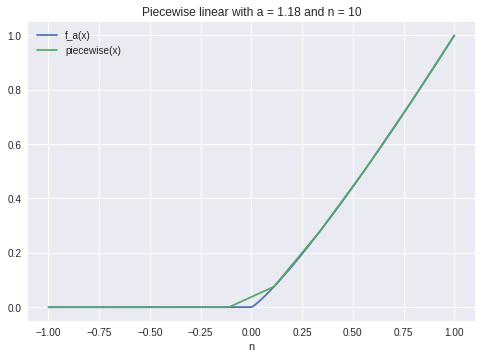

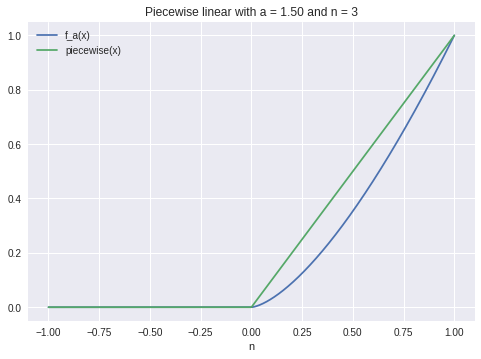

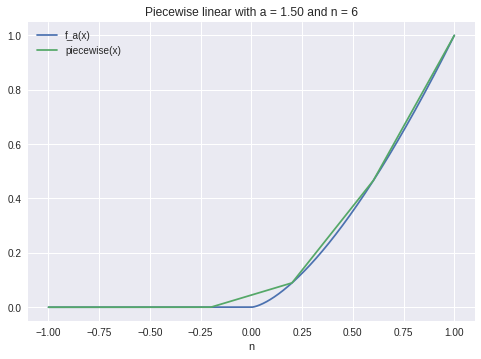

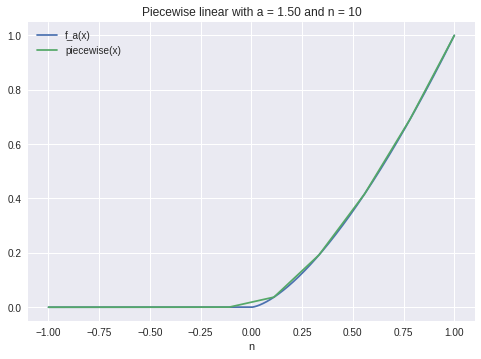

In [17]:
for a in np.linspace(0.2, 1.5, 5):
  for n in [3,6,10]:
    fa = f(a)
    piecewise = piecewise_linear(fa, n)

    x = np.linspace(-1,1,1000)
    plt.plot(x, [fa(x_i) for x_i in x], label='f_a(x)')
    plt.plot(x, [piecewise(x_i) for x_i in x], label='piecewise(x)')
    plt.legend()
    plt.title("Piecewise linear with a = {:.2f} and n = {}".format(a, n))
    plt.xlabel("n")
    plt.show()

We now plot the approximated supremum error for different values of $a$, and plot against values of $n$. We then find $r$ such that $n^{-r}$ best approximates the error.

Given a = 1.500, r = 1.695


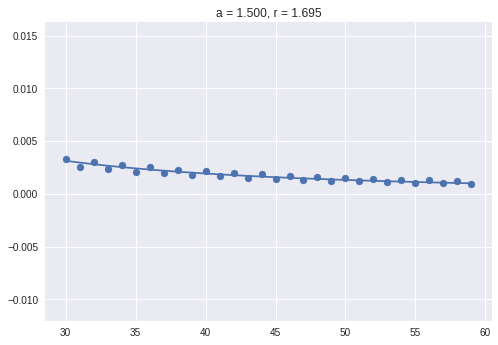

Given a = 1.611, r = 1.774


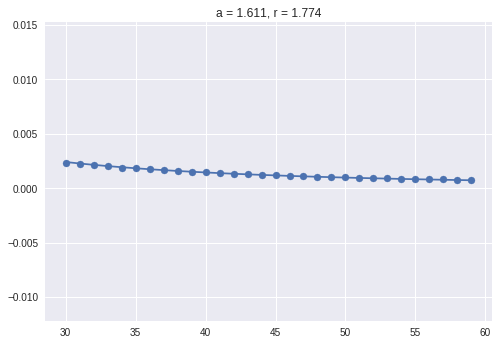

Given a = 1.722, r = 1.853


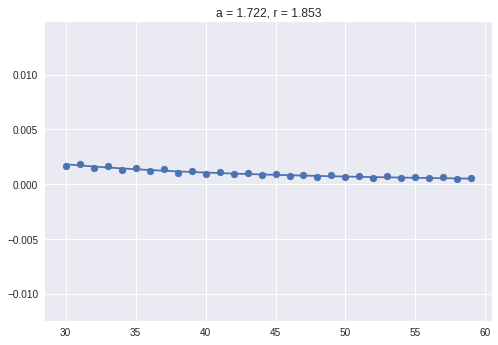

Given a = 1.833, r = 1.906


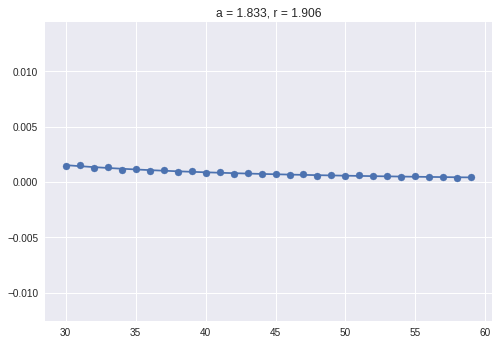

Given a = 1.944, r = 1.958


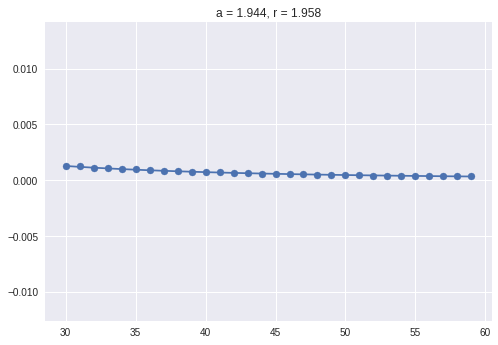

Given a = 2.056, r = 1.963


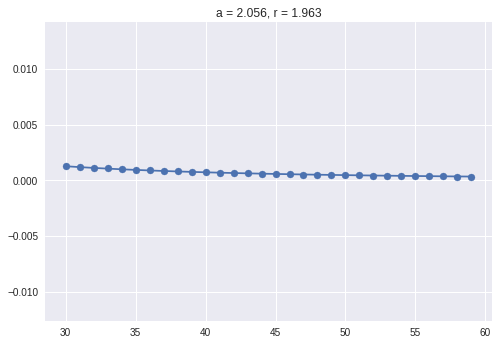

Given a = 2.167, r = 1.922


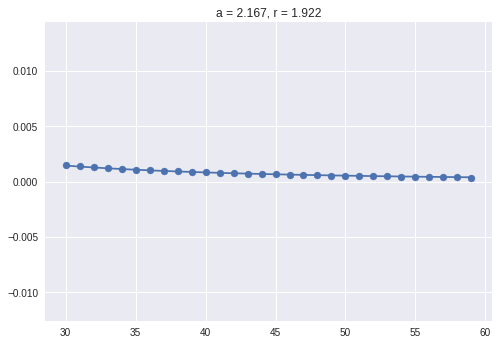

Given a = 2.278, r = 1.884


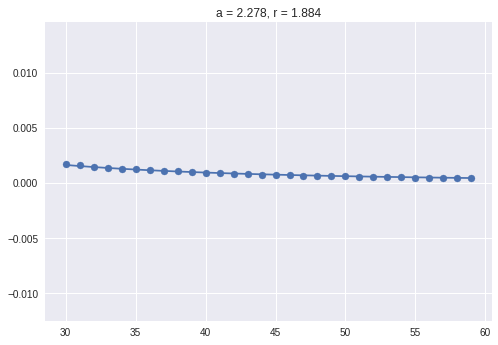

Given a = 2.389, r = 1.849


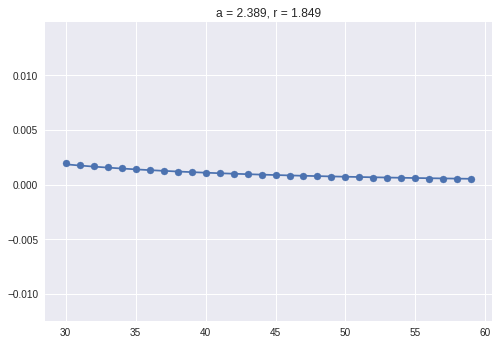

Given a = 2.500, r = 1.816


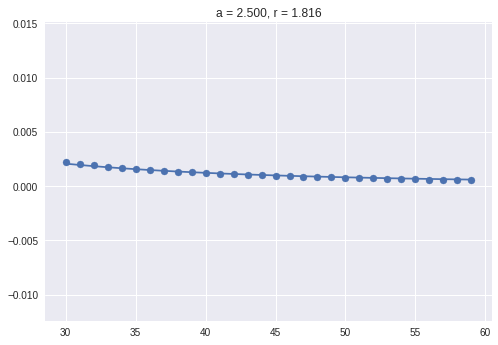

In [21]:
def r(a):
  fa = f(a)
  def r_a(n):
    return norm(fa, piecewise_linear(fa, n))
  return r_a


def approx_error(n, r):
  return np.power(n, -r)
  

def computeR():
  for a in np.linspace(1.5, 2.5, 10):
    fa = f(a)
    norm_per_n = lambda n: norm(fa, piecewise_linear(fa, n))
    ns = range(30, 60)
    ys = [norm_per_n(n) for n in ns]
    r, _ = curve_fit(approx_error, ns, ys)
    r = r[0]
    print("Given a = {:.3f}, r = {:.3f}".format(a, r))
    plt.scatter(ns, ys, label='norm')
    plt.plot(ns, approx_error(ns, r), label='r(n)')
    plt.title("a = {:.3f}, r = {:.3f}".format(a, r))
    plt.show()
    

computeR()

We see a somewhat similar trend as in question 2. For $a \leq 2$, the corresponding $r$ value is only slightly less than $a$. For $a$ values greater than $2$ however, the $r$ parameter starts slightly decreasing.

For $x \in (t, t+n^{-1})$, we have that the piecewise linear approximation is  
$$g_{a,n}(x) = \frac{f_a(t + \frac{1}{n}) - f_a(t)}{\frac{1}{n}}(x-t) + f(t)$$

Once again using Taylor's theorem, we get that

$$f(x) = f(t) + f'(t)(x-t) + O(n^{-2})$$

and so

$$\frac{f_a(t + \frac{1}{n}) - f_a(t)}{\frac{1}{n}} \approx f_a'(t)$$

So therefore $f(x) - g(x) = O(n^{-2})$. 

Using Jackson's inequality, and the fact that for $a \in (1,2)$, $f_a \in C^{1,1-a}$, we get that the error is $\lesssim n^{-1 - (1-a)} = n^{-a}$ 

# Question 4

In [0]:
def bernstein_basis(n, v):
    return lambda x: scipy.misc.comb(n, v)*np.power(x, v)*np.power(1 - x, n-v)

def bernstein(f, n):
    basis = [bernstein_basis(n, v) for v in range(n+1)]
    points = np.linspace(-1,1,n+1)
    return lambda x: sum(f(points[i]) * b((x+1)/2) for i,b in enumerate(basis))

Below are a few plots of $f_a(x)$ vs Bernstein polynomials approximating $f_a$ for different values of $a$ and $n$.

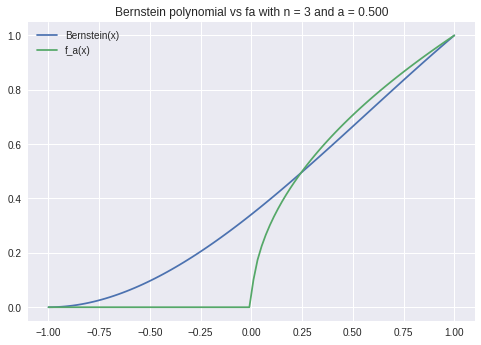

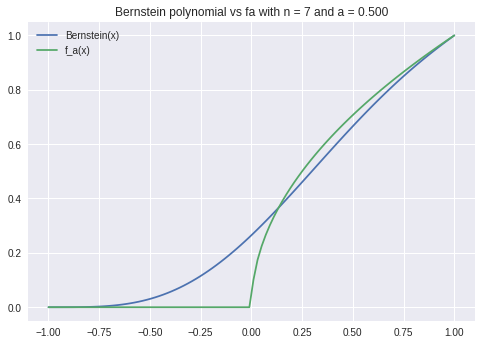

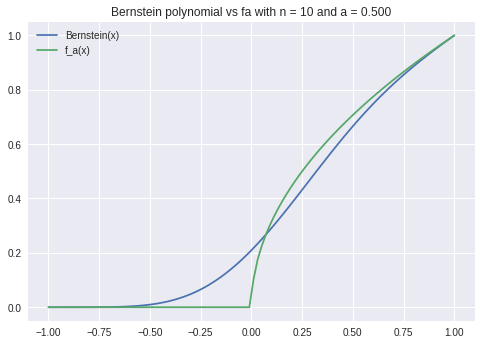

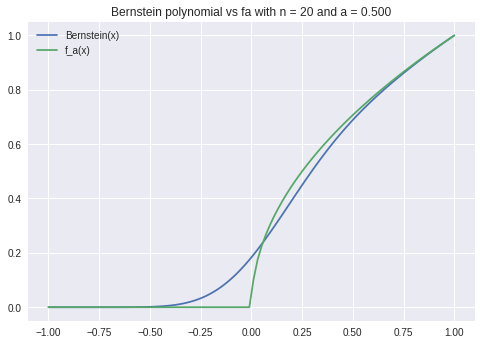

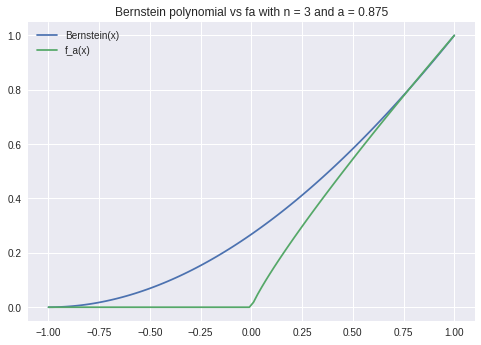

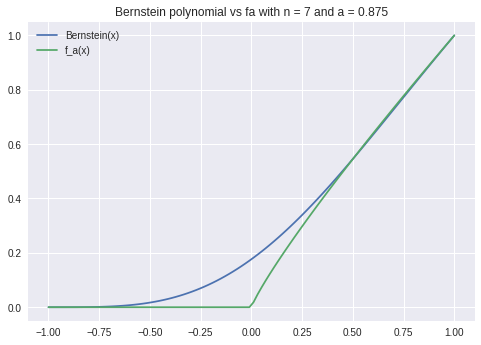

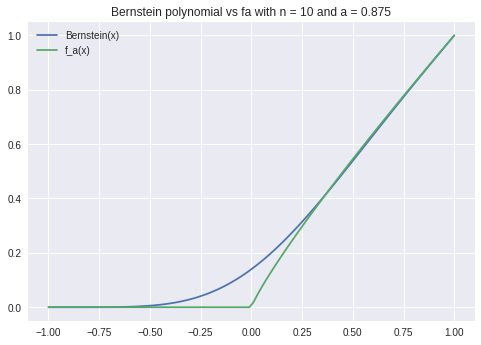

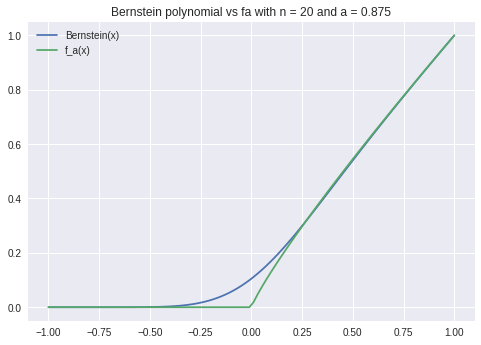

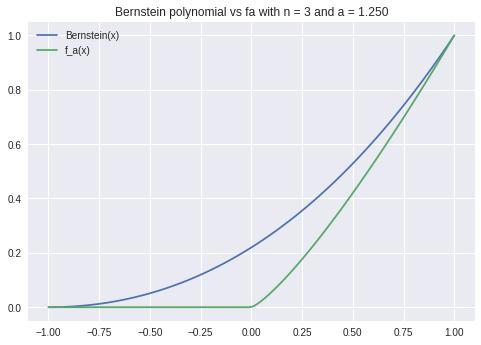

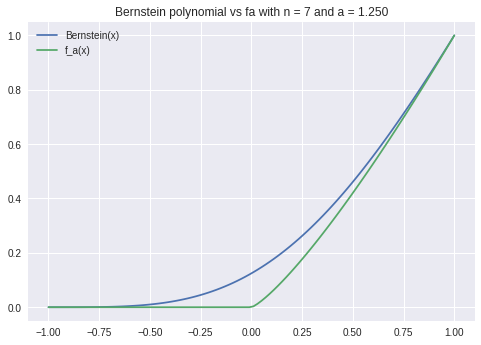

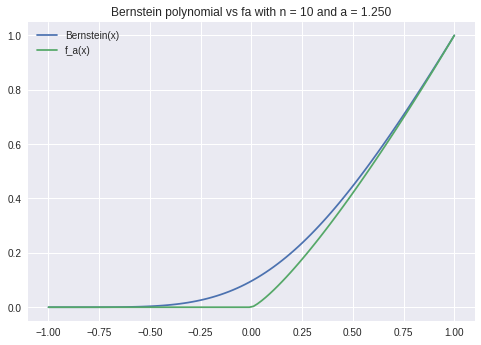

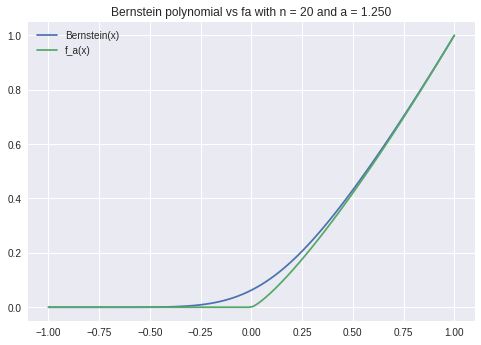

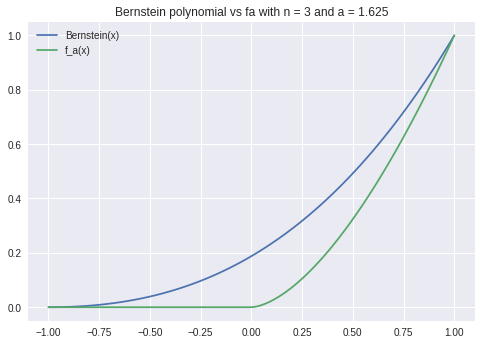

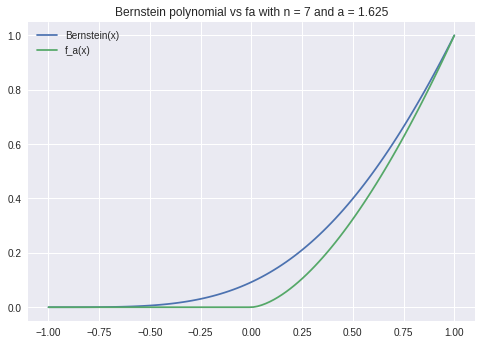

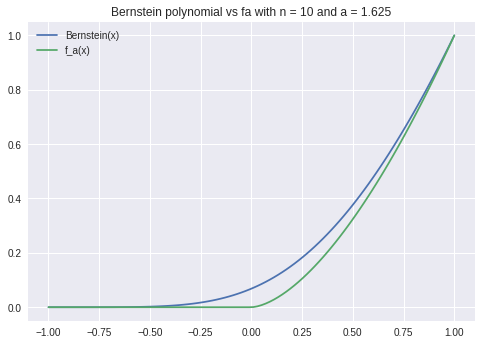

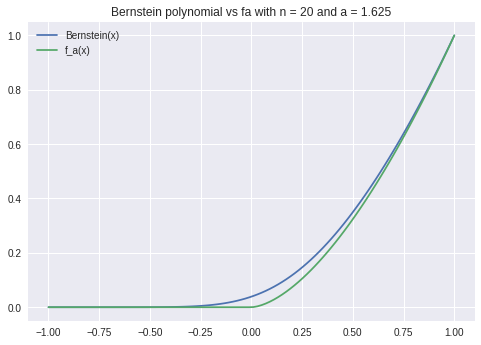

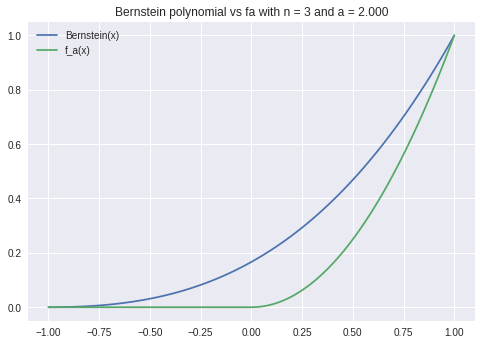

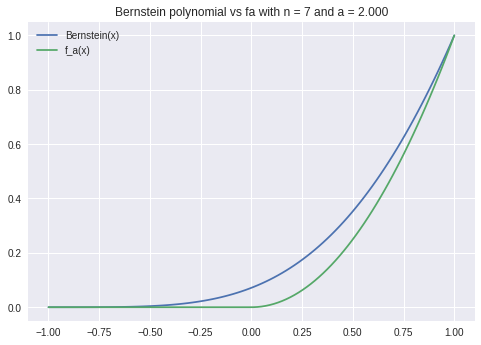

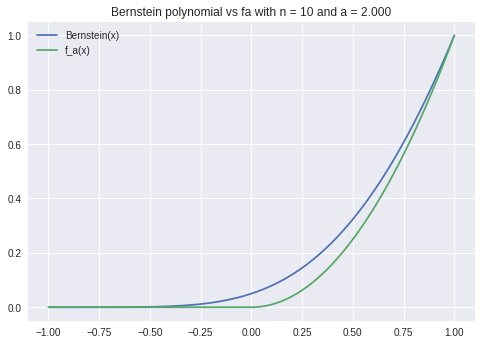

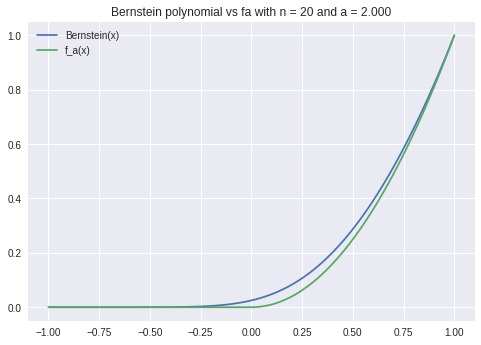

In [64]:
x = np.linspace(-1,1,100)
for a in np.linspace(0.5, 2, 5):
  for n in [3,7,10,20]:
    fa = f(a)
    bf = bernstein(fa, n)
    plt.plot(x, bf(x), label='Bernstein(x)')
    plt.plot(x, [fa(xi) for xi in x], label='f_a(x)')
    plt.legend()
    plt.title("Bernstein polynomial vs fa with n = {} and a = {:.3f}".format(n, a))
    plt.show()

We now plot the approximated supremum error for different values of $a$, and plot against values of $n$. We then find $r$ and $c$ such that $c\cdot n^{-r}$ best approximates the error.

Given a = 0.500, r = 0.234, c = 0.382


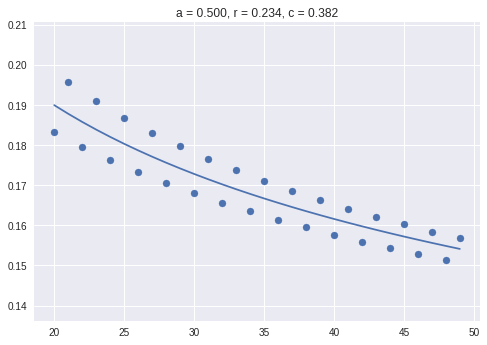

Given a = 1.000, r = 0.498, c = 0.396


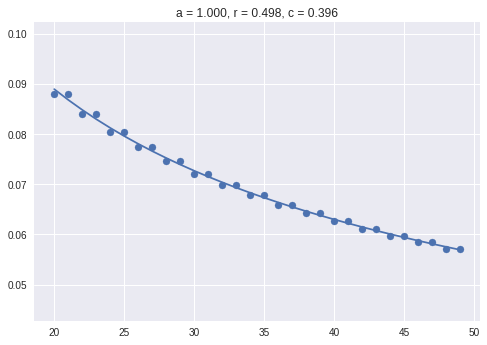

Given a = 1.500, r = 0.748, c = 0.477


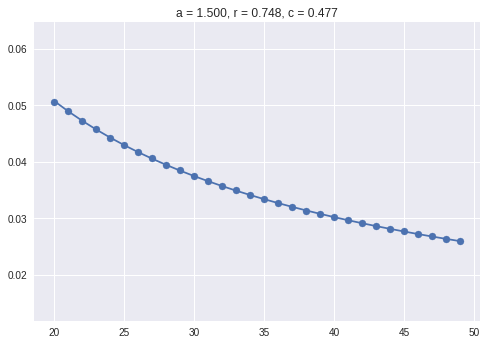

Given a = 2.000, r = 0.938, c = 0.735


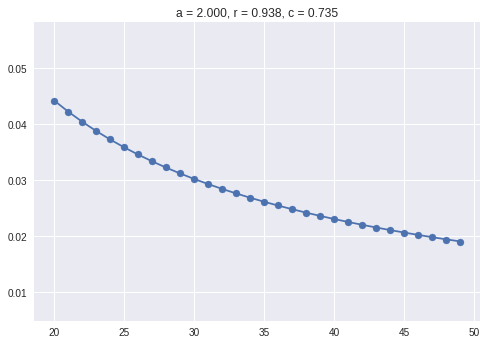

Given a = 2.500, r = 0.977, c = 0.906


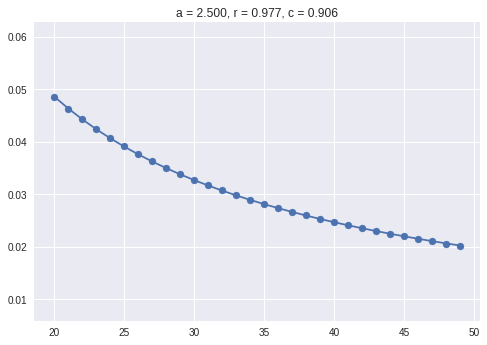

452.7155616283417


In [70]:
def r(a):
  fa = f(a)
  def r_a(n):
    return norm(fa, bernstein(fa, n))
  return r_a


def approx_error(n, r, c):
  return c*np.power(n, -r)
  

def computeR():
  for a in np.linspace(0.5, 2.5,5):
    fa = f(a)
    norm_per_n = lambda n: norm(fa, bernstein(fa, n), 5000)
    ns = range(20,50)
    ys = [norm_per_n(n) for n in ns]
    q, _ = curve_fit(approx_error, ns, ys)
    r, c = q
    print("Given a = {:.3f}, r = {:.3f}, c = {:.3f}".format(a, r, c))
    plt.scatter(ns, ys, label='norm')
    plt.plot(ns, approx_error(ns, r, c), label='r(n)')
    plt.title("a = {:.3f}, r = {:.3f}, c = {:.3f}".format(a, r, c))
    plt.show()
    
from time import time
start = time()
computeR()
end = time()

print(end-start)

Using Bernstein polynomials, the error appears to be proportional to $n^{-\frac{a}{2}}$ for $a \leq 2$. Similarly to the piecewise approximations, for $a > 2$, the $r$ parameter does not seem to continue to increase. It seems to max out near $1$.

In class we showed that for $f \in C^{0,a}$, then the error is $\lesssim n^{-\frac{a}{2}}$. This gives the experimental results for $a < 2$. 

# Question 5

In [0]:
def chebyshev_point(a, b, n, k):
    return 0.5*(a + b) + 0.5*(b - a)*np.cos((2*k - 1) / (2*n) * np.pi)

def chebyshev_nodes(a, b, n):
    return np.array([chebyshev_point(a,b,n,k) for k in range(1, n+1)])
  
def chebyshev(fa, n):
    x = chebyshev_nodes(-1,1,n)
    return scipy.interpolate.lagrange(x, [fa(xi) for xi in x])

Below are a few plots of $f_a(x)$ vs Chebyshev polynomial interpolation for $f_a$ for different values of $a$ and $n$.

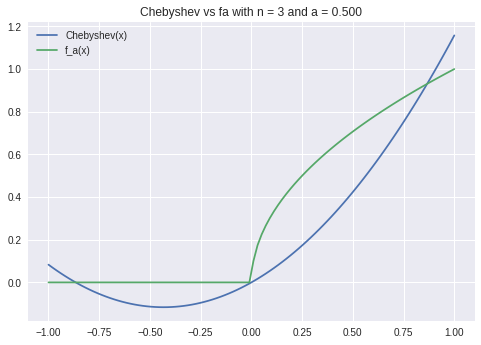

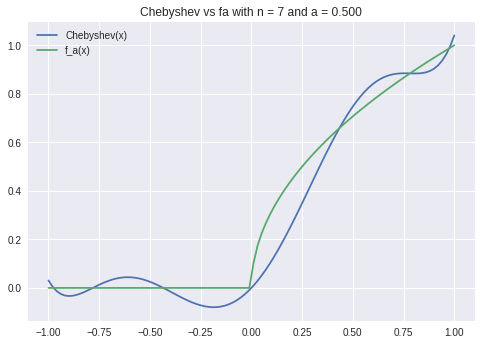

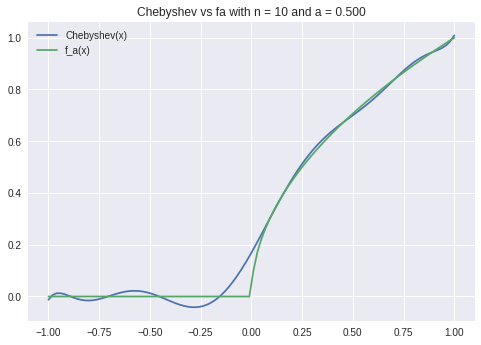

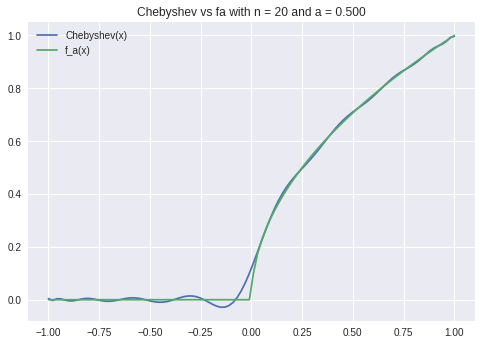

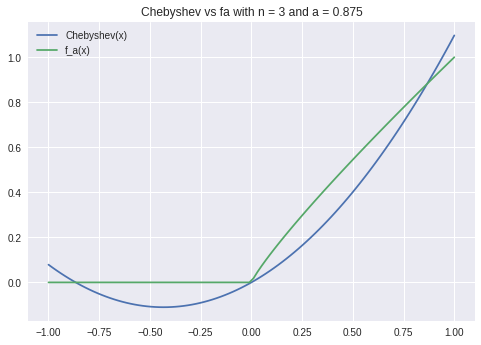

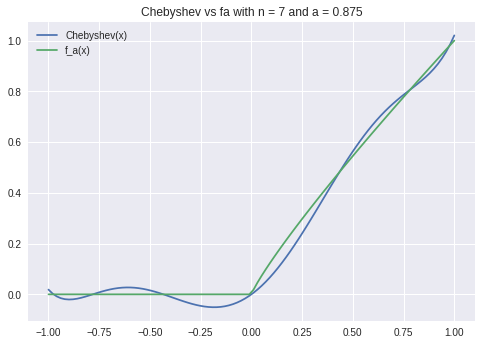

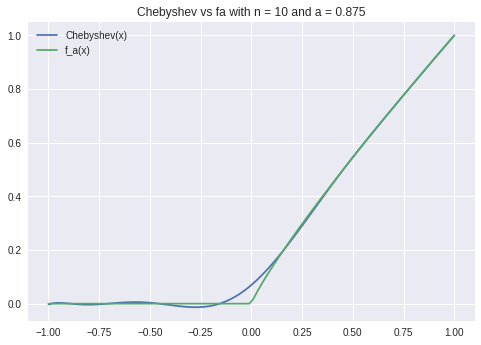

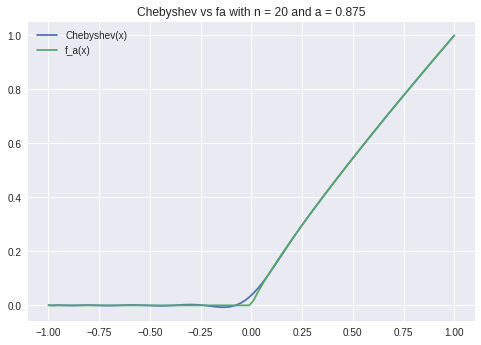

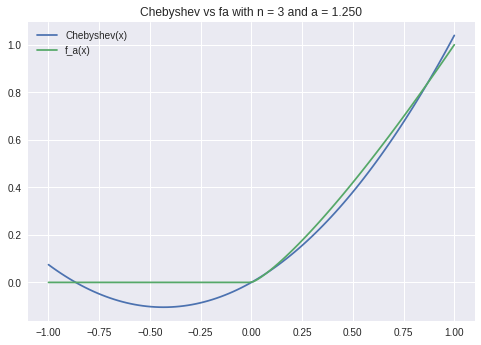

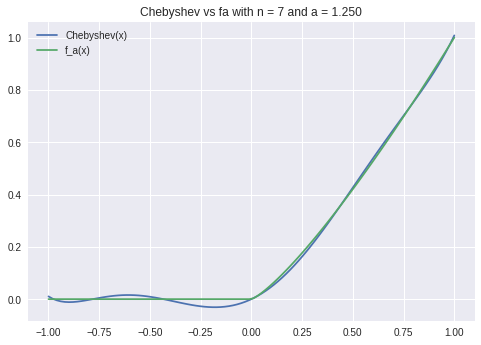

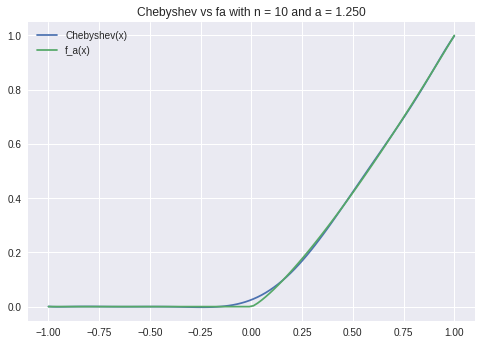

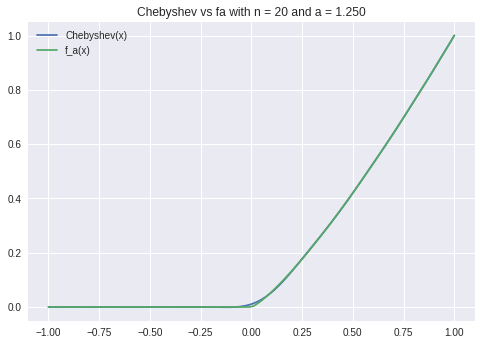

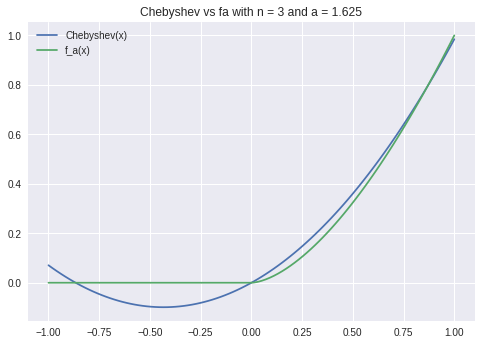

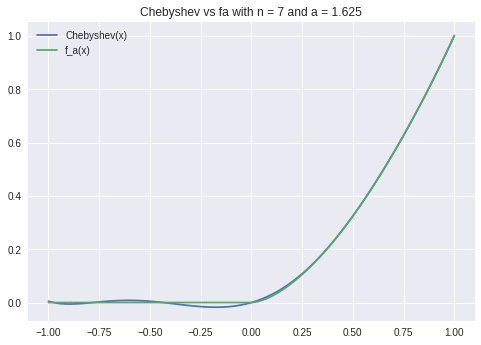

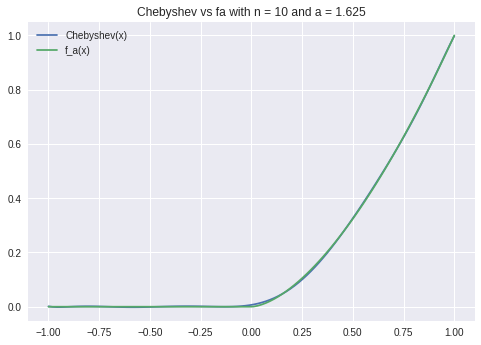

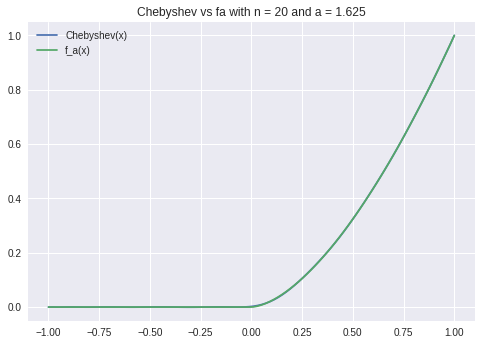

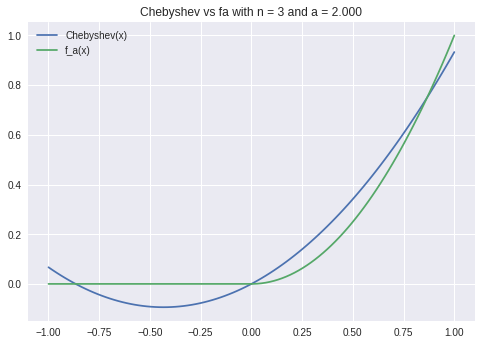

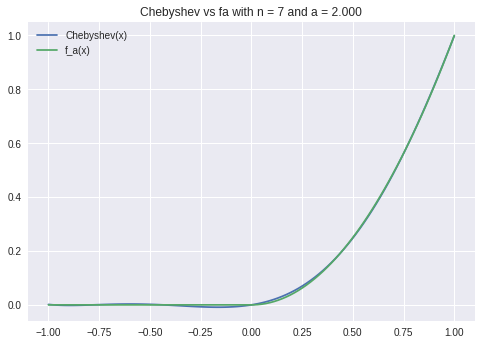

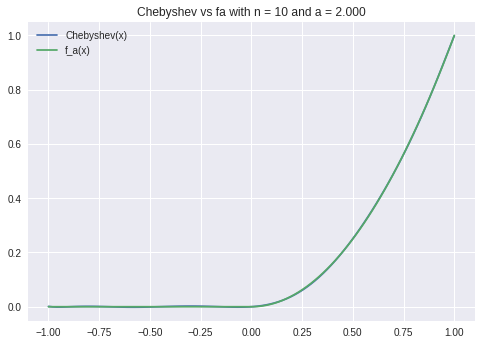

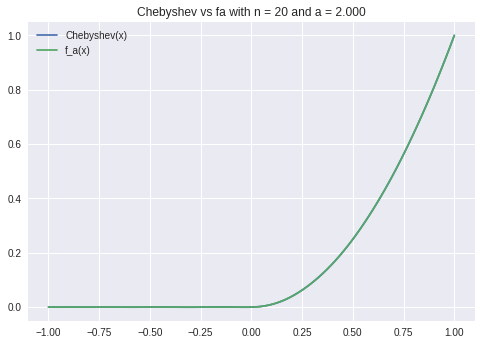

In [24]:
x = np.linspace(-1,1,100)
for a in np.linspace(0.5, 2, 5):
  for n in [3,7,10,20]:
    fa = f(a)
    cheb = chebyshev(fa, n)
    plt.plot(x, cheb(x), label='Chebyshev(x)')
    plt.plot(x, [fa(xi) for xi in x], label='f_a(x)')
    plt.legend()
    plt.title("Chebyshev vs fa with n = {} and a = {:.3f}".format(n, a))
    plt.show()

We now plot the approximated supremum error for different values of $a$, and plot against values of $n$. We then find $r$ and $c$ such that $c\cdot n^{-r}$ best approximates the error.

Given a = 0.500, r = 0.503, c = 0.542


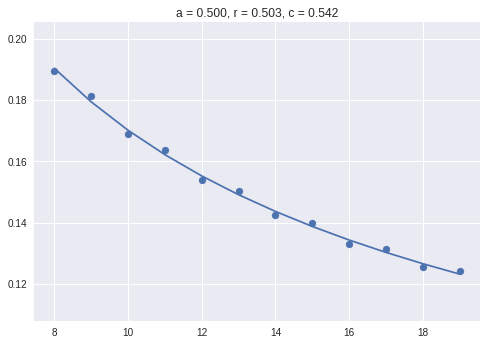

Given a = 1.000, r = 1.206, c = 0.677


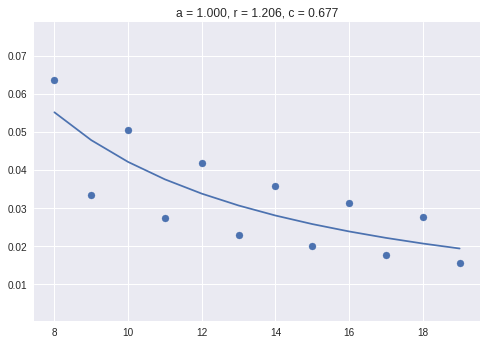

Given a = 1.500, r = 1.539, c = 0.421


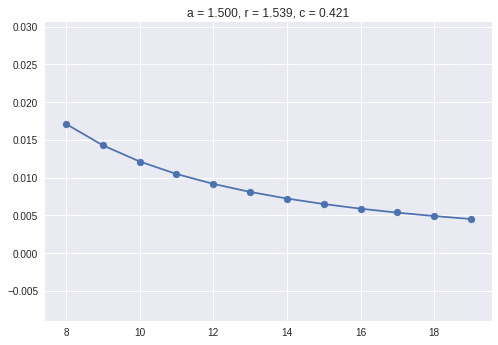

Given a = 2.000, r = 1.808, c = 0.194


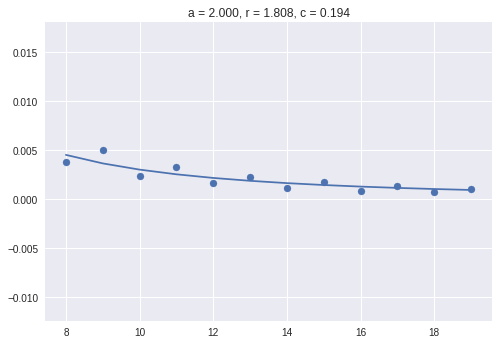

Given a = 2.500, r = 2.583, c = 0.813


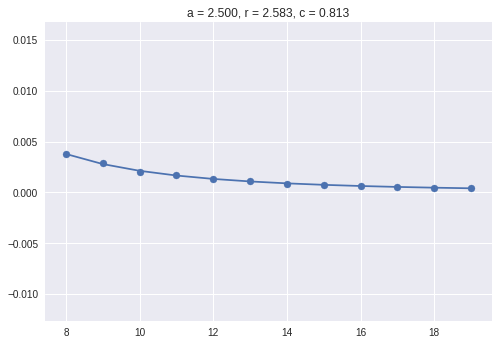

In [27]:
def r(a):
  fa = f(a)
  def r_a(n):
    return norm(fa, chebyshev(fa, n))
  return r_a


def approx_error(n, r, c):
  return c*np.power(n, -r)
  

def computeR():
  for a in np.linspace(0.5, 2.5,5):
    fa = f(a)
    norm_per_n = lambda n: norm(fa, chebyshev(fa, n), 5000)
    ns = range(8,20)
    ys = [norm_per_n(n) for n in ns]
    q, _ = curve_fit(approx_error, ns, ys)
    r, c = q
    print("Given a = {:.3f}, r = {:.3f}, c = {:.3f}".format(a, r, c))
    plt.scatter(ns, ys, label='norm')
    plt.plot(ns, approx_error(ns, r, c), label='r(n)')
    plt.title("a = {:.3f}, r = {:.3f}, c = {:.3f}".format(a, r, c))
    plt.show()
    

computeR()

Using Chebyshev interpolation, the error seems to be proportional to $n^{-a}$ However, unlike the other approximation methods, the error does not seem to have a limit.

As can be seen be the above results, the Chebyshev interpolation converges faster for more smooth functions. We can see this since for larger $a$ values, the error converges more quickly then it does for smaller $a$ values. Since for $a < 1$, $f_a$ isn't differentiable at $0$, and the error converges less rapidly.